In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from rich.console import Console
from rich.table import Table
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/spam-detection/spam.csv')
df = df.dropna()

In [3]:
X = df['EmailText']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [4]:
console = Console()

In [5]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [6]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [7]:
y_pred = model.predict(X_test)

In [8]:
table = Table(title="Model Accuracy")
table.add_column("Model")
table.add_column("Method")
table.add_column("Accuracy")

accuracy = accuracy_score(y_test, y_pred)
table.add_row("SVM", "TF-IDF", f"{accuracy:.4f}")

In [9]:
console.print(table)

       Model Accuracy        
┏━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓
┃ Model ┃ Method ┃ Accuracy ┃
┡━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩
│ SVM   │ TF-IDF │ 0.9839   │
└───────┴────────┴──────────┘

In [10]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       982
        spam       1.00      0.86      0.93       133

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



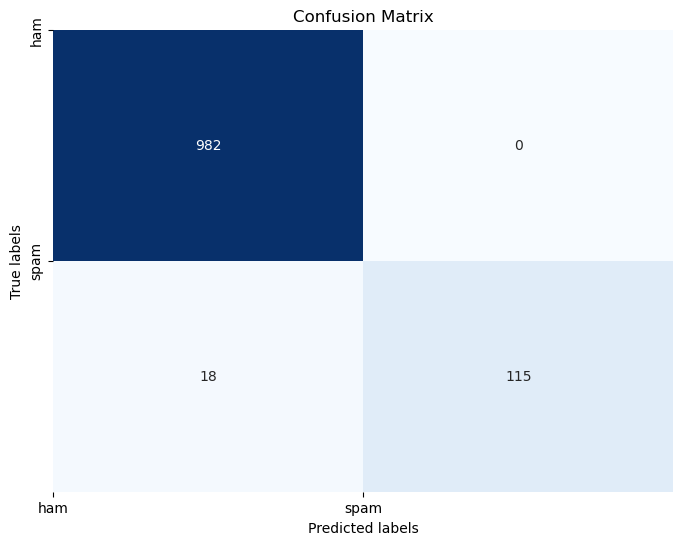

In [11]:
classes = np.unique(y_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)

plt.show()